In [1]:
# -*- coding: utf-8 -*-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# doan code sinh du lieu
# numOfPoint = 30
# # khoi tao random roi reshape ve vector cot
# noise = np.random.normal(0,1,numOfPoint).reshape(-1,1)
# # khoi tao theo linear roi reshape
# x= np.linspace(30,100,numOfPoint).reshape(-1,1)
# N = x.shape[0]
# y = 15*x +8 + 20*noise
# plt.scatter(x,y)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0, 0.5, 'giá')

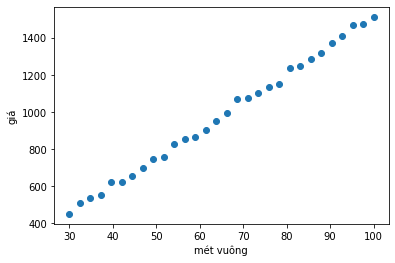

In [19]:
data = pd.read_csv('/content/drive/MyDrive/VCCorp/data_linear.csv').values
N = data.shape[0]
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
# vẽ ra theo x, y
plt.scatter(x,y)
# đặt tên
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [16]:
# khởi tạo x
x = np.hstack((np.ones((N, 1)),x))
print(x)

[[  1.      30.    ]
 [  1.      32.4138]
 [  1.      34.8276]
 [  1.      37.2414]
 [  1.      39.6552]
 [  1.      42.069 ]
 [  1.      44.4828]
 [  1.      46.8966]
 [  1.      49.3103]
 [  1.      51.7241]
 [  1.      54.1379]
 [  1.      56.5517]
 [  1.      58.9655]
 [  1.      61.3793]
 [  1.      63.7931]
 [  1.      66.2069]
 [  1.      68.6207]
 [  1.      71.0345]
 [  1.      73.4483]
 [  1.      75.8621]
 [  1.      78.2759]
 [  1.      80.6897]
 [  1.      83.1034]
 [  1.      85.5172]
 [  1.      87.931 ]
 [  1.      90.3448]
 [  1.      92.7586]
 [  1.      95.1724]
 [  1.      97.5862]
 [  1.     100.    ]]


In [7]:
# khởi tạo w
w= np.array([0., 1.]).reshape(-1,1)

[3773.30950042]
[3773.30908428]
[3773.30866825]
[3773.3082523]
[3773.30783641]
[3773.30742056]
[3773.30700475]
[3773.30658896]
[3773.30617319]
[3773.30575744]
[3773.3053417]
[3773.30492597]
[3773.30451024]
[3773.30409452]
[3773.30367881]
[3773.3032631]
[3773.3028474]
[3773.3024317]
[3773.302016]
[3773.3016003]
[3773.30118461]
[3773.30076892]
[3773.30035323]
[3773.29993755]
[3773.29952186]
[3773.29910618]
[3773.29869051]
[3773.29827483]
[3773.29785916]
[3773.29744349]
[3773.29702782]
[3773.29661215]
[3773.29619649]
[3773.29578083]
[3773.29536517]
[3773.29494951]
[3773.29453386]
[3773.29411821]
[3773.29370256]
[3773.29328691]
[3773.29287127]
[3773.29245562]
[3773.29203998]
[3773.29162435]
[3773.29120871]
[3773.29079308]
[3773.29037745]
[3773.28996182]
[3773.28954619]
[3773.28913057]
[3773.28871495]
[3773.28829933]
[3773.28788371]
[3773.2874681]
[3773.28705249]
[3773.28663688]
[3773.28622127]
[3773.28580566]
[3773.28539006]
[3773.28497446]
[3773.28455886]
[3773.28414327]
[3773.28372767]
[

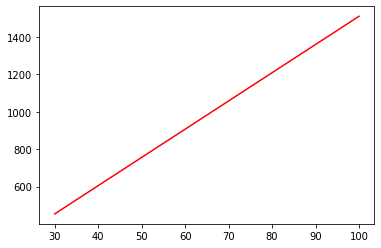

In [17]:
numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1,numOfIteration):
  r = np.dot(x,w) - y
  cost[i] = 0.5*np.sum(r*r)
  w[0] -= learning_rate*np.sum(r)
  # correct the shape dimension
  w [1] -= learning_rate*np.sum(np.multiply(r,x[:,1].reshape(-1,1)))
  print(cost[i])
predict = np.dot(x,w)
plt.plot((x[0][1],x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

In [9]:
x1 = 50
y1 = w[0] + w[1]*x1
print('Gia nha cho 50 m2 la: ',y1)

Gia nha cho 50 m2 la:  [755.68795083]


In [10]:
#luu w voi numpy.save(), dinh dang '.npy'
np.save('weight.npy',w)

In [30]:
#doc file npy chua tham so weight
w = np.load('weight.npy')
print(w)

[[ 0.19473324]
 [15.10986435]]


In [25]:
# Linear Regression voi thu vien sklearn
from sklearn.linear_model import LinearRegression


In [26]:
data = pd.read_csv('/content/drive/MyDrive/VCCorp/data_linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

Text(0, 0.5, 'price')

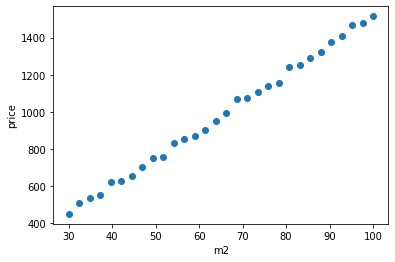

In [27]:
plt.scatter(x,y)
plt.xlabel('m2')
plt.ylabel('price')

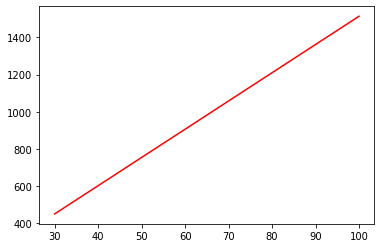

In [28]:
# tao mo hinh hoi quy tuyen tinh
lrg = LinearRegression()
#train mo hinh voi data dat
lrg.fit(x, y)
# doan gia dat
y_pred = lrg.predict(x)
plt.plot((x[0],x[-1]),(y_pred[0], y_pred[-1]), 'r')
plt.show()

In [29]:
# luu nhieu tham so voi numpy.savez(), dinh dang '.npy'
np.savez('w2.npz', a=lrg.intercept_, b = lrg.coef_)
print(lrg.intercept_, lrg.coef_)

[-7.06426865] [[15.2110908]]


In [ ]:
# lay lai cac tham so trong file .npz
k = np.load('w2.npz')
lrg.intercept_ = k['a']
lrg.coef_ = k['b']